# logistic regression

# decision tree

In [13]:
import pandas as pd
import sklearn
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [14]:
rs = np.random.RandomState(123)

df = pd.read_csv('diabetes.csv')
df.info() # all numbers, yay!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
df = df.dropna()
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=rs, shuffle=True)
#df.shape => (768, 9); you should know this already though from .info()

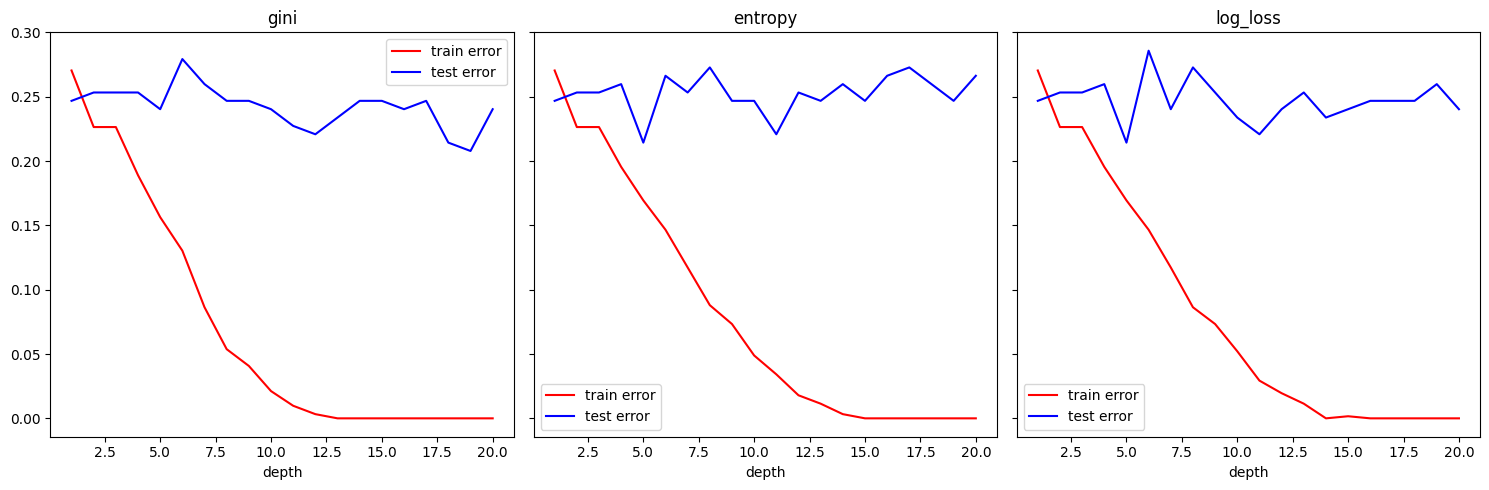

In [27]:
from sklearn.metrics import accuracy_score, log_loss
N = 20 # depth

criterions = ['gini', 'entropy', 'log_loss']

fig, axs = plt.subplots(1,3,figsize=(15,5),sharey=True)
for ax,c in zip(axs, criterions):
    train_errs = np.empty(N)
    test_errs = np.empty(N)
    for d in range(N):
        model = DecisionTreeClassifier(max_depth=d+1, criterion=c)
        model.fit(X_train, y_train)
    
        train_errs[d] = 1-accuracy_score(y_train, model.predict(X_train))
        test_errs[d] = 1-accuracy_score(y_test, model.predict(X_test))

    ds = np.linspace(1,N, N)
    ax.plot(ds, train_errs, color='red', label='train error')
    ax.plot(ds, test_errs, color='blue', label='test error')
    ax.set_xlabel("depth")
    ax.set_title("{}".format(c))
    ax.legend()

plt.tight_layout()
plt.show() # clearly overfitting.

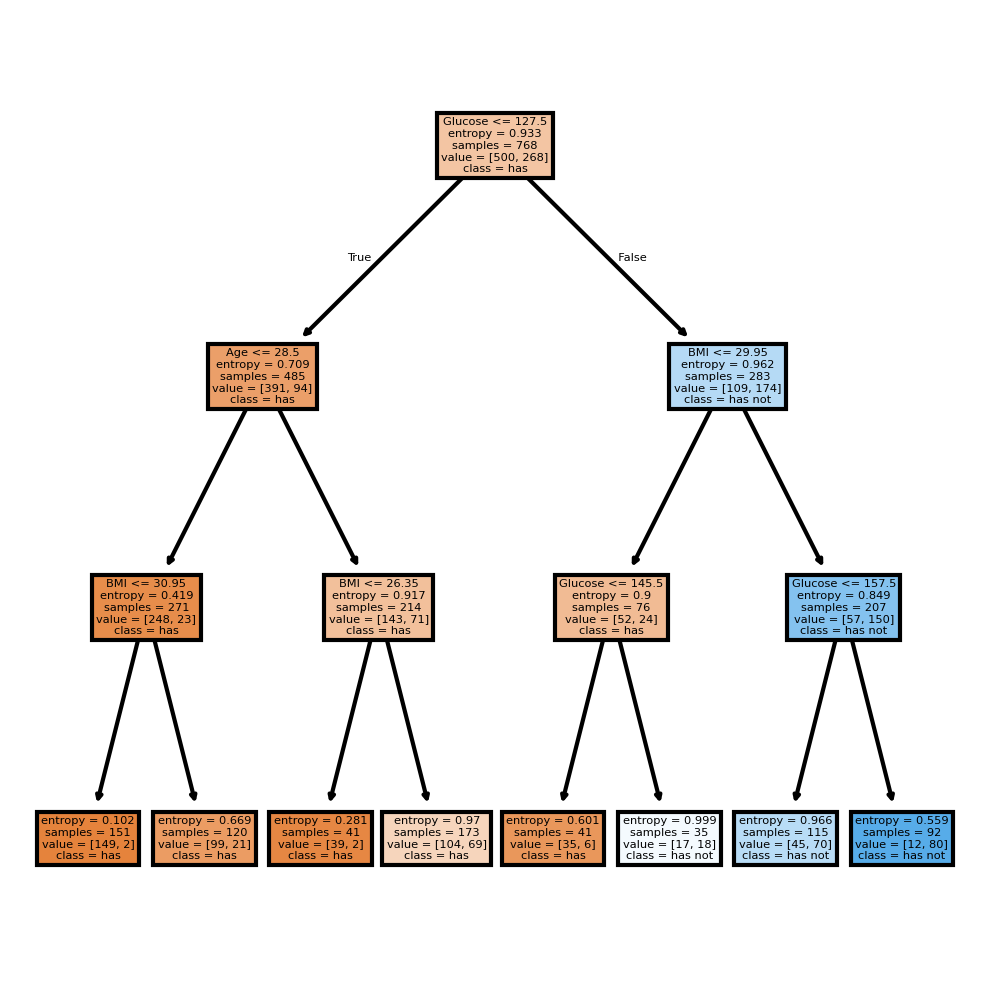

In [29]:
fnames = df.columns[:-1].to_list()
tname = df.columns[-1]
model = DecisionTreeClassifier(max_depth = 3, criterion='entropy').fit(X,y)
fig, axes = plt.subplots(1,1, figsize=(4,4), dpi=300)
tree.plot_tree(model, feature_names=fnames, class_names=['has', 'has not'], filled=True)
plt.show()